# Unsupervised


## Clustering (군집화)
- 유유상종. 비슷한, 공통된 특성을 보이는 것들끼리 모으는 일.  
- 공통적인 특성이라 하는데, 비슷한/공통적인 것을 어떻게 재나?  무엇을 보고 특성이라 하나?  
- 선생님(정답, 레이블)이 없어 clustering을 인도해줄 절대적인 존재가 없다.
- 하지만 데이터 자체가 어떤 정보를 갖고 있다면 (즉 random noise가 아니라면), 데이터는 어떤 구조를 갖고 있을 것이다. Unsupervised learning/Clustering은 데이터에 이런 구조가 있는지 찾아보고, 구조에서 정보를 추출하고, 패턴 같은 것이 보이면 이에 따라 공통된 특성들을 보이는 것들끼리 그룹핑이 가능한 가 등을 따지는 일 
- 사실, 비슷한 것들끼리 묶음은, 그 행위를 할 수 있다는 자체가 대상을 구별할 수 있다는 뜻. **구별함**은 **추상화**와 매우 밀접.  
- Unsupervised learning은 이런 것! 클러스터링에는 정답이 없다. 어렵다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics  

%matplotlib inline
plt.style.use('seaborn-white')

## Principal Component Analysis

## Clustering (군집화)

### k-means
- K-Means는 데이터 포인트가 증가함에 따라 계산 시간이 거의 기하급수적으로 증가. 이 경우 [MiniBatch KMeans](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans). 
- 뒤에 나올 Hierarchical Clustering과 달리 처음부터 클러스터 개수(K)를 몇 개로 할까 정하고 군집화를 시작
- Standardization이 유용한 경우가 많음

In [53]:
from IPython.display import Image

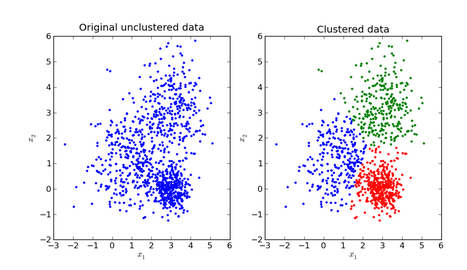

In [54]:
no = "051"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

In [2]:
from sklearn.cluster import KMeans

#### 50개 샘플이 두 군집(Cluster)으로 된 모의 데이터 만들기

Text(0, 0.5, 'X1')

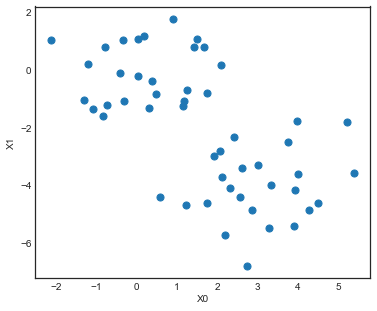

In [3]:
np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

#### K=2: cluster 개수를 2로 하여 K-means clustering 하기

In [4]:
kmean = KMeans(n_clusters=2, random_state=1, n_jobs=-1)    # n_clusters=2 
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

####  K-Means Clustering이 50개 샘플들을 어떻게 군집화 했는지 보려면 : ' labels_' attribute로 
- K-Means가 군집을 나타내기 위한 레이블로 (0, 1)을 사용
- K-Means가 할당한 군집 레이블은 군집을 구별하기 위함이기에 이 레이블을 아무 숫자로 해도 됨  

In [5]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

#### cluster의 중심(centroid) 위치는,

In [6]:
kmean.cluster_centers_

array([[ 3.03552977, -4.00898689],
       [ 0.20742071, -0.1255273 ]])

***total within-cluster sum of squares*** : "inertia_" attribute 
- K-Means 군집화는 주어진 K 군집 중 inertia_ 가 가장 작도록 최적화  

In [7]:
kmean.inertia_

125.8630566030779

#### Cluster Plotting: 샘플들의 Clustering을 plot  (cluster 중심과 함께),

Text(0, 0.5, 'X1')

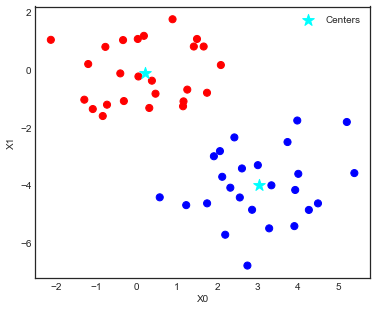

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmean.labels_, cmap=plt.cm.bwr) 
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=150,
            color='cyan', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

완벽히 clustering 함

#### K=3,

Text(0, 0.5, 'X1')

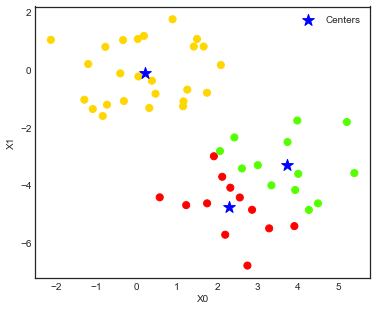

In [9]:
kmean = KMeans(n_clusters=3, random_state=1)
kmean.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmean.labels_, cmap=plt.cm.prism) 
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

In [10]:
# Cluster 개수 K를 늘리면 total within cluster sum of squared error는 줄어듬. 
kmean.inertia_

99.2951930365756

#### K=4

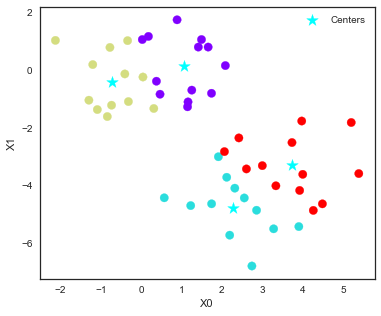

In [64]:
kmean = KMeans(n_clusters=4, random_state=1, n_init=150)   # 초기화를 바꾸어 가면서 150번 실행 
kmean.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmean.labels_, cmap=plt.cm.rainbow) 
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=150,
            color='cyan', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

#### K-means clustering 결과를 요약해 한 번에 보려면,

In [65]:
vars(kmean)    # K=4 

{'algorithm': 'auto', 'cluster_centers_': array([[ 1.07089482,  0.1375865 ],
        [ 2.28740842, -4.77813481],
        [-0.72800959, -0.41056724],
        [ 3.72610332, -3.29900419]]), 'copy_x': True, 'inertia_': 77.2272483842616, 'init': 'k-means++', 'labels_': array([1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3,
        3, 3, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0], dtype=int32), 'max_iter': 300, 'n_clusters': 4, 'n_init': 150, 'n_iter_': 1, 'n_jobs': 1, 'precompute_distances': 'auto', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}

#### Changes in Clustering as K increase from 2 to 4 (K가 2,3,4로 변화함에 따른 군집화를 보면)

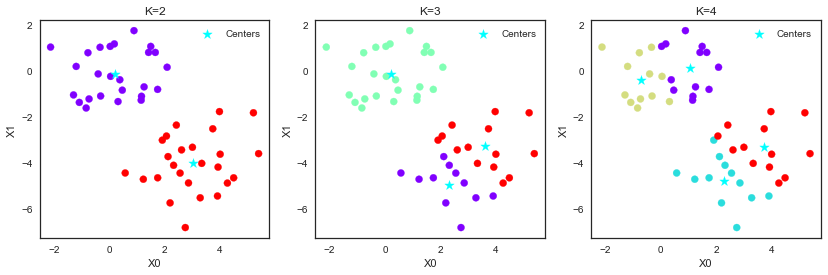

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

K_range = range(2, 5)
for K, axis in zip(K_range, fig.axes):
    kmean = KMeans(n_clusters=K, random_state=1, n_init=100)   # 초기화를 바꾸어 가면서 100번 실행 
    kmean.fit(X)
    axis.scatter(X[:,0], X[:,1], s=50, c=kmean.labels_, cmap=plt.cm.rainbow) 
    axis.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=100,
                 color='cyan', label='Centers')
    axis.legend(loc='best')
    axis.set_title("K=%s" % K)
    axis.set_xlabel('X0')
    axis.set_ylabel('X1')

### 재미있는 기능 : 군집화가 완료된 상태에서 새로운 샘플을 던져 이 샘플이 어떤 군집에 속하는 지 알아볼 수도 
- 원래 label이 없던 데이터에 Clustering을 해 군집 label을 만들고, 그리고 이를 이용해 classification 
- [K-Means prediction](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict)

[2 2 1 2 1 2 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
()
0    25
1    12
2    13
dtype: int64


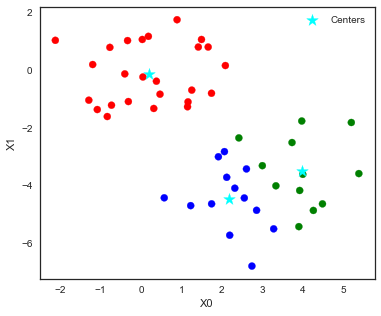

In [67]:
# K=3 으로 군집화가 되었을 때 모양 
kmean_3 = KMeans(n_clusters=3, random_state=1)
kmean_3.fit(X)
plt.figure(figsize=(6,5))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:,0], X[:,1], s=50, color=rgb[kmean_3.labels_]) 
plt.scatter(kmean_3.cluster_centers_[:, 0], kmean_3.cluster_centers_[:, 1], marker='*', s=150,
            color='cyan', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(kmean_3.labels_)
print()
print(pd.Series(kmean_3.labels_).value_counts(sort=False))

- 붉은색 샘플들이 레이블 '0', 녹색이 '1', 파란색이 '2'

#### 새로운 샘플 X_new 를 20개 만들어 앞의 kmean_3 군집에 던져 어떤 군집에 속할 지를 보면 (즉,  각 X_new들이 어떤 cluster center에 가장 가까운 가를 보면)  

Generate 20 new samples and predict where these new samples will be assigned 

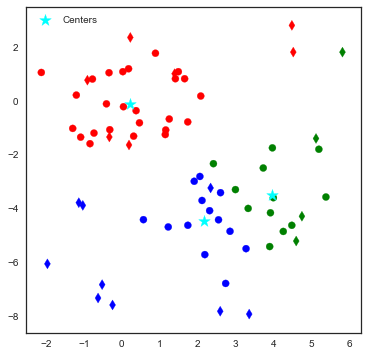

In [68]:
# 원래 clustering (Original Clustering)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=50, color=rgb[kmean_3.labels_]) 
plt.scatter(kmean_3.cluster_centers_[:, 0], kmean_3.cluster_centers_[:, 1], marker='*', s=150,
            color='cyan', label='Centers')
plt.legend(loc='best')

# 새로운 샘플들 생성 Generate new samples 
np.random.seed(100)
X_new_x = np.random.uniform(low=-2, high=6, size=20)
X_new_y = np.random.uniform(low=-8, high=3, size=20)
X_new = np.column_stack((X_new_x, X_new_y))      

# 새로운 샘플들이 어떤 군집에 속할 지 예측 (새로운 샘플: 다이어먼드, 군집 예측: 색깔) 
# Predict cluster assignment for new samples X_new (X_new: diamond shape,  Cluster: Color)
X_new_pred = kmean_3.predict(X_new)
plt.scatter(X_new[:,0], X_new[:,1], s=50, marker='d', color=rgb[X_new_pred]) 


This was easy.

---------

## 10.5.2 Hierarchical Clustering- Scikit-learn의 [(Agglomerative clustering)](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) 이용하여,
- Scikit-learn에서는 Hierarchical Clustering을 Agglomerative Clustering(bottom-up, 상향식 군집화) 이란 이름으로 
- Hierarchical Clustering은 상향식 방법. 여러개의 작은 클러스터에서 시작해,작은 클러스터들을 묶어가면서 큰 클러스터를 만들고, 나중에는 하나의 클러스터로 통일
- Hierarchical Clustering은 데이터가 Hierarchical 구조를 지닐 때 효과적 (가령, 동/식물 분류 : 동물 아래 [사람, 개, 고양이 .... ], 사람 아래에 [흑인, 동양인, 백인. ...], 동양인 아래에 [한국인, 베트남인, 인도인....] 
- **dendogram**을 제공하지 않음 (Agglomerative Clustering in scikit-learn does not offer depicting a dendogram)
- **dendogram**을 보면서 어느 지점에서 'cut' 하면 좋을 지 할 수 없기에, Agglomerative Clustering은 클러스터 개수 K를 군집화를 시작할 때 지정해야
- 어떤 Linkage, Similarity(Distance Measure) 를 사용하는가 매우 중요
- Standardization이 종종 유용함 
- 'ward' linkage : two clusters that lead to the minimum increase of the total within-cluster SSE are merged


In [11]:
from sklearn.cluster import AgglomerativeClustering

#### 앞에서 사용한 X를 그대로 사용
K=2

In [12]:
hclust = AgglomerativeClustering(n_clusters=2)    # cluster_개수=2, Linkage='ward', similarity='euclidean'
hclust.fit(X)
hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

#### Clustering 을 plot

Text(0, 0.5, 'X1')

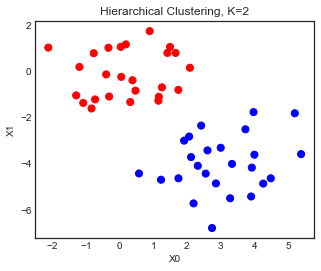

In [13]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], s=50, c=hclust.labels_, cmap=plt.cm.bwr) 
plt.title("Hierarchical Clustering, K=2")
plt.xlabel('X0')
plt.ylabel('X1')

잘 되었음

** K-Means Clustering과 Hierarchical Clustering 비교. K-Means Clustering vs. Hierarchical Clustering('ward' linkage) ** Ward variance minimization algorithm. : ward

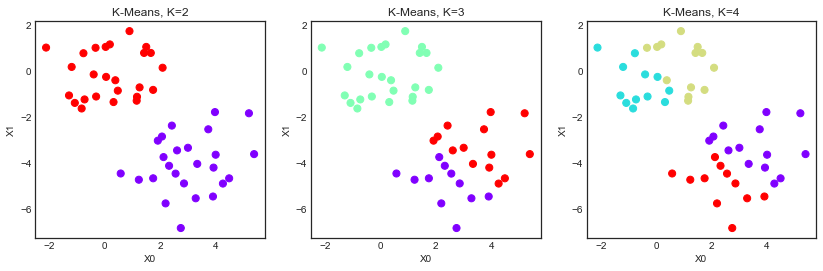

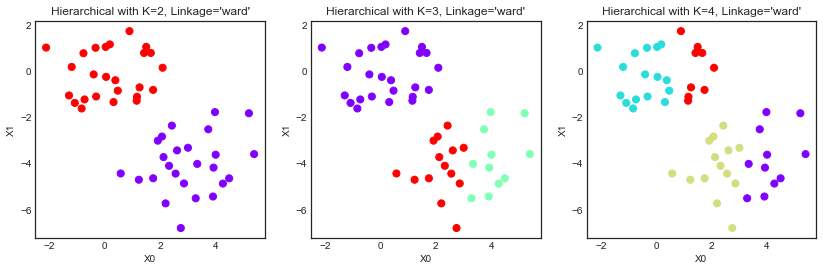

In [14]:
fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

K_range = range(2, 5)

for K, axis in zip(K_range, fig1.axes):
    kmean = KMeans(n_clusters=K, random_state=1, n_init=100)   # 초기화를 바꾸어 가면서 100번 실행 
    kmean.fit(X)
    axis.scatter(X[:,0], X[:,1], s=50, c=kmean.labels_, cmap=plt.cm.rainbow) 

    axis.set_title("K-Means, K=%s" % K)
    axis.set_xlabel('X0')
    axis.set_ylabel('X1')

fig2, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
for K, axis in zip(K_range, fig2.axes):
    hclust = AgglomerativeClustering(n_clusters=K)   
    hclust.fit(X)
    axis.scatter(X[:,0], X[:,1], s=50, c=hclust.labels_, cmap=plt.cm.rainbow) 

    axis.set_title("Hierarchical with K=%s, Linkage='ward'" % K)
    axis.set_xlabel('X0')
    axis.set_ylabel('X1')

K가 3, 4 일 때 결과 다름.  일반적으로 K-Means와 Hierarchical Clustering은 다른 결과를 냄. They are different when K=3 or 4.     

#### Hierarchical Clustering에서 Linkage 방법을 'complete' 그리고 'average'로 했을 경우 (Comparison of Hierarchical Clustering when Linkage is 'complete' or  'average')

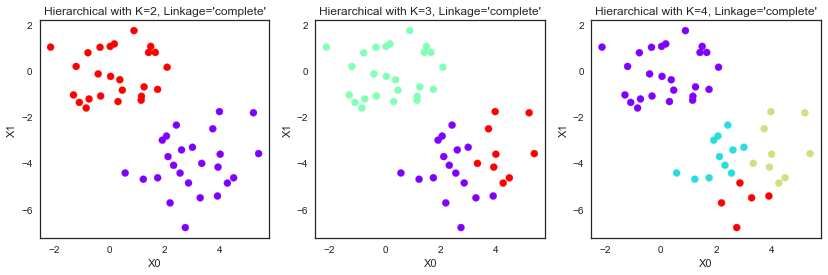

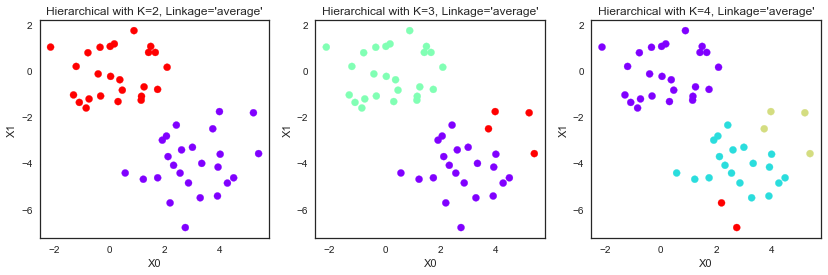

In [73]:
K_range = range(2, 5)

fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
for K, axis in zip(K_range, fig1.axes):
    hclust = AgglomerativeClustering(n_clusters=K, linkage='complete')   
    hclust.fit(X)
    axis.scatter(X[:,0], X[:,1], s=50, c=hclust.labels_, cmap=plt.cm.rainbow) 

    axis.set_title("Hierarchical with K=%s, Linkage='complete'" % K)
    axis.set_xlabel('X0')
    axis.set_ylabel('X1')

fig2, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
for K, axis in zip(K_range, fig2.axes):
    hclust = AgglomerativeClustering(n_clusters=K, linkage='average')   
    hclust.fit(X)
    axis.scatter(X[:,0], X[:,1], s=50, c=hclust.labels_, cmap=plt.cm.rainbow) 

    axis.set_title("Hierarchical with K=%s, Linkage='average'" % K)
    axis.set_xlabel('X0')
    axis.set_ylabel('X1')

Linkage에 따라서도 다른 결과를 냄 

## EX) NCI 60 Data Example
- 64개의 암 세포 데이터로써, feature는 6830 개의 유전체 발현 레벨(nci.data)이고 response는 14개 암 종류를 나타내는 64개의 observation (nci.labs) 
- NCI microarray data. The data contains expression levels on 6830 genes from 64 cancer cell lines. Cancer type is also recorded.
- data is a 64 by 6830 matrix of the expression values while labs is a vector listing the cancer types for the 64 cell lines
- [추가정보](http://genome-www.stanford.edu/nci60/)

### NCI 60 데이터 분석 방향 :
- nci 데이터는 observation의 수가 64개로 얼마 되지 않음. 반면 feature들의 수가 6830으로 훨씬 많음. 이로부터 우선 몇가지 시사점을 얻음. 
- Supervised Learning을 적용하려는데, 
- Random Forest나 Boosting 같이 우선 생각해 볼 수 있는 ensemble 방법들을 쓰기에 observation 개수가 적음. 
- 클래스의 수가 (암 종류) 14 이므로, 멀티 클래스 supervised learning에 해당. Observation이 많으면 신경망을 고려할 만 한데 샘플이 64개 이니 적용 불가!!!
- KNN은?  64개 밖에 안되는 샘플에 dimension이 6000개가 넘음. 적용 불가!!!
- 그러면, logistic regression은? Observation 수가 많지 않아도 쓸 수 있지 않나? Parametric이라 데이터에 많은 제한(가정)을 하지만. Logistic regression이 멀티 클래스에 잘 하나? 별로!  Logistic regression은 알고리즘 자체가 데이터간 interaction이나 feature 중요성을 감안하지 않음. Feature(간) 특성들 잘 알아서 해주는 RF나 Boosting Tree 계열, 뉴럴네트가 좋은데,,,       
- 어떻게 하지?
- 가뜩이나 얼마 안되는 샘플을 무슨 필터링해서 없애는 것은 좋은 생각이 아닐 것 같고, 그럼 feature를 줄여보자. 그러다 보면 무슨 수가 생길 거야.
- 설마 6830개 feature가 다 서로 독립적인 정보들로 꽉 차 있지는 않겠지? 쓸 모 없는, 아니면 서로 관련된 것들이 있을 거야. . 
- PCA를 해 보자
- Clustering도 해 보자. Feature가 많으니, PCA를 해서 principal component score들을 feature로 써 보자. 

#### Data Load 및 점검

In [15]:
path1= "data/NCI60_labs.csv"
nci_labs = pd.read_csv(path1, index_col=0)
path2= "data/NCI60_data.csv"
nci_data = pd.read_csv(path2, index_col=0)

# 백업 
nci_labs_bak = nci_labs.copy()    
nci_data_bak = nci_data.copy()

nci_data.shape       # The data has 64 rows and 6830 columns
print("nci_data:")
nci_data.info()
print("\nThe number of null values = %s" % nci_data.isnull().sum().sum())  # null test. 데이터에 null 이 없음  

nci_labs.x.unique().size    # 총 14개의 암 종류 
nci_labs.x.value_counts(sort=True)  

nci_data:
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB

The number of null values = 0


RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7D-repro    1
MCF7A-repro    1
K562A-repro    1
K562B-repro    1
UNKNOWN        1
Name: x, dtype: int64

잠재적 문제, Problem : Class instance가 한 개만 있는 것이 다섯.  There are 5 classes that have just one instance.

-------
## Step1:  NCI60 데이터에 PCA 행함. 

In [16]:
from sklearn import decomposition
from sklearn import preprocessing

preprocessing.StandardScaler(copy=False).fit_transform(nci_data) 

# Instantiate PCA estimator
pca = decomposition.PCA()
# fit, transform을 사용해 principal component score를 구함 
nci_data_PC = pca.fit(nci_data)
nci_data_PC_Z = nci_data_PC.transform(nci_data)

In [17]:
nci_data_PC_Z.shape   # 64개 PC score를 구함 

(64, 64)

#### Principal Component Score 를 Plot

Text(0, 0.5, 'Z3')

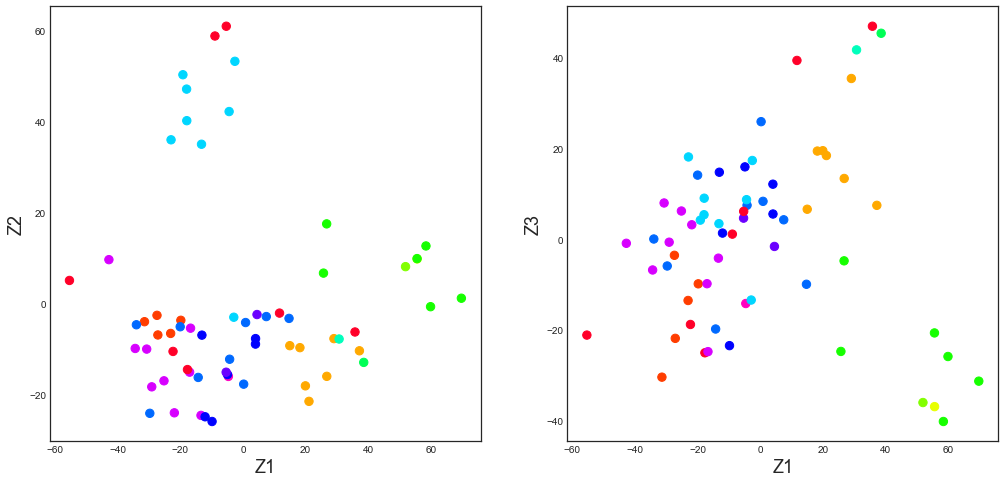

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))

Z1 = nci_data_PC_Z[:, 0]    # 첫번째 Principal component score 
Z2 = nci_data_PC_Z[:, 1]    # 두번째 Principal component score
Z3 = nci_data_PC_Z[:, 2]    # 세번째 Principal component score


le = preprocessing.LabelEncoder()
ax1.scatter(Z1, Z2, s=70, c=le.fit_transform(nci_labs.x), cmap=plt.cm.gist_rainbow)     
ax1.set_xlabel('Z1', size=18)
ax1.set_ylabel('Z2', size=18)

ax2.scatter(Z1, Z3, s=70, c=le.fit_transform(nci_labs.x), cmap=plt.cm.gist_rainbow) 
ax2.set_xlabel('Z1', size=18)
ax2.set_ylabel('Z3', size=18)

위 두 개의 플롯은 가장 중요한 첫 3 개의 principal component score들을 'nci_labs' 레이블(암 종류)에 따라 색깔을 입힌 것이다. 같은 색깔, 즉 같은 암 종류는 (비교적) 가까운 거리에 뭉쳐 있음이 보임. 즉, 같은 암 종류는 (전반적으로) 비슷한 gene expression을 보임을 알 수 있다. 이런 시각화를 통한 이해는 우리가 PCA를 통해 6830 개 feature에 담겨있는 gene expression 정보를 요약/압축해 보았기에 가능했음. 

#### Principal Component (Loading) matrix를 보자
- feature 개수가 6000개가 넘기에 그 긴 linear combination의 감을 잡기에 어렵다
- 그러나, 첫째 PC에서 가장 큰 영향을 준 feature가 어떤 것이고 그 값이 얼마나 되는지는 확인하자

In [19]:
PCs = pd.DataFrame(nci_data_PC.components_.T, index=nci_data.columns)
print("Index of max weight feature of PC1:%s, with weight= %s" % (PCs.iloc[:,0].argmax(), PCs.iloc[:,0].max() ))

Index of max weight feature of PC1:1814, with weight= 0.027322555955124013


#### Percentage of Variance Explained (PVE)와 Cumulative PVE plotting

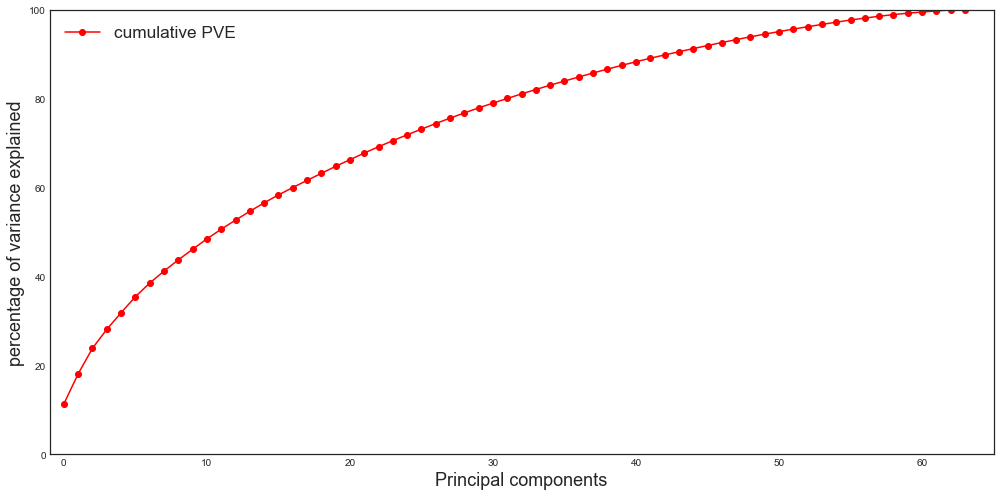

In [27]:
# Percentage of Variance Explained by each PC:
plt.figure(figsize=(14, 7))
plt.ylim(0, 100)
plt.xlim(-1, 65)
#plt.bar(left=range(0, nci_data_PC.explained_variance_ratio_.size), height=nci_data_PC.explained_variance_ratio_* 100 , width=0.3, align='center', label='percentage of variance explained')
plt.plot(np.cumsum(nci_data_PC.explained_variance_ratio_) * 100, 'ro-', label='cumulative PVE')

plt.ylabel('percentage of variance explained', size=18)
plt.xlabel('Principal components', size=18)
plt.legend(loc='best', fontsize='xx-large')
plt.tight_layout()

7번째 까지의 PC들이 데이터 variance의 약 40% 정도를 설명. 그 뒤의 PC들이 계속 variance 설명을 추가하지만, 그것들은 PVE가 급격히 약화됨. 

## Step2: NCI60 데이터 군집화
#### 목적
- 샘플들이 암 타입에 따라 군집하는 지 알아봄 

#### Standardize 된 nci_data에 Hierarchical Clustering 적용

In [48]:
# nci_data는 이미 standardize 되어 있다.  이를 확인하려면, nci_data 중 일부 column을 샘플해 describe()를 해 봄 
nci_data.sample(10, axis=1).describe()

,5380,4419,3112,893,5566,1070,2699,4379,5125,1162
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,1.734723e-18,7.285839e-17,5.204170e-18,5.551115e-17,3.816392e-17,6.765422e-17,-4.510281e-17,8.326673e-17,-3.469447e-17,-2.688821e-17
std,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00
min,-2.652975e+00,-1.545009e+00,-2.605905e+00,-2.636554e+00,-1.979751e+00,-3.220132e+00,-2.072752e+00,-1.769133e+00,-2.072539e+00,-2.054897e+00
25%,-6.882470e-01,-4.808140e-01,-5.685506e-01,-7.622561e-01,-6.338015e-01,-5.278615e-01,-7.727236e-01,-6.803071e-01,-7.839340e-01,-6.450296e-01
50%,3.323527e-02,-2.000526e-01,-4.073856e-02,9.587067e-02,-1.697473e-01,-1.041869e-01,-7.763227e-02,-1.359035e-01,-4.849035e-02,-5.135311e-02
75%,7.497246e-01,3.614447e-01,7.720920e-01,6.453487e-01,4.926371e-01,5.608906e-01,8.105399e-01,4.939846e-01,6.734202e-01,5.360433e-01
max,2.180207e+00,3.717371e+00,2.566653e+00,2.195972e+00,2.225620e+00,3.540153e+00,1.994770e+00,2.383575e+00,2.488317e+00,2.644659e+00


평균(mean)이 0에 가깝고, 표준편차(std)들은 1 --> standardization 되었음 

In [49]:
# standardization이 되었는지 보는 간단한 방법으로, 아래와 같이 column들의 mean을 구한 뒤 이 들의 합과, variance를 
# 구한 뒤 이들의 합을 보아 각각 0 과 feature 개수에 근접하는 지가 있음   
np.mean(nci_data, axis=0).sum() , np.var(nci_data, axis=0).sum()

(4.8589401274203026e-15, 6830.0)

--------------

### Hierarchical Clustering on entire data - with complete, single, average linkages
이제 **전체 feature에** SciPy의 Hierarchical Clustering을 적용한다. Distance 방법으로 'Euclidean'을 쓰고, complete, single, average linkage에 따라 군집화가 어떻게 다른가 본다 

In [50]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as scipyhc

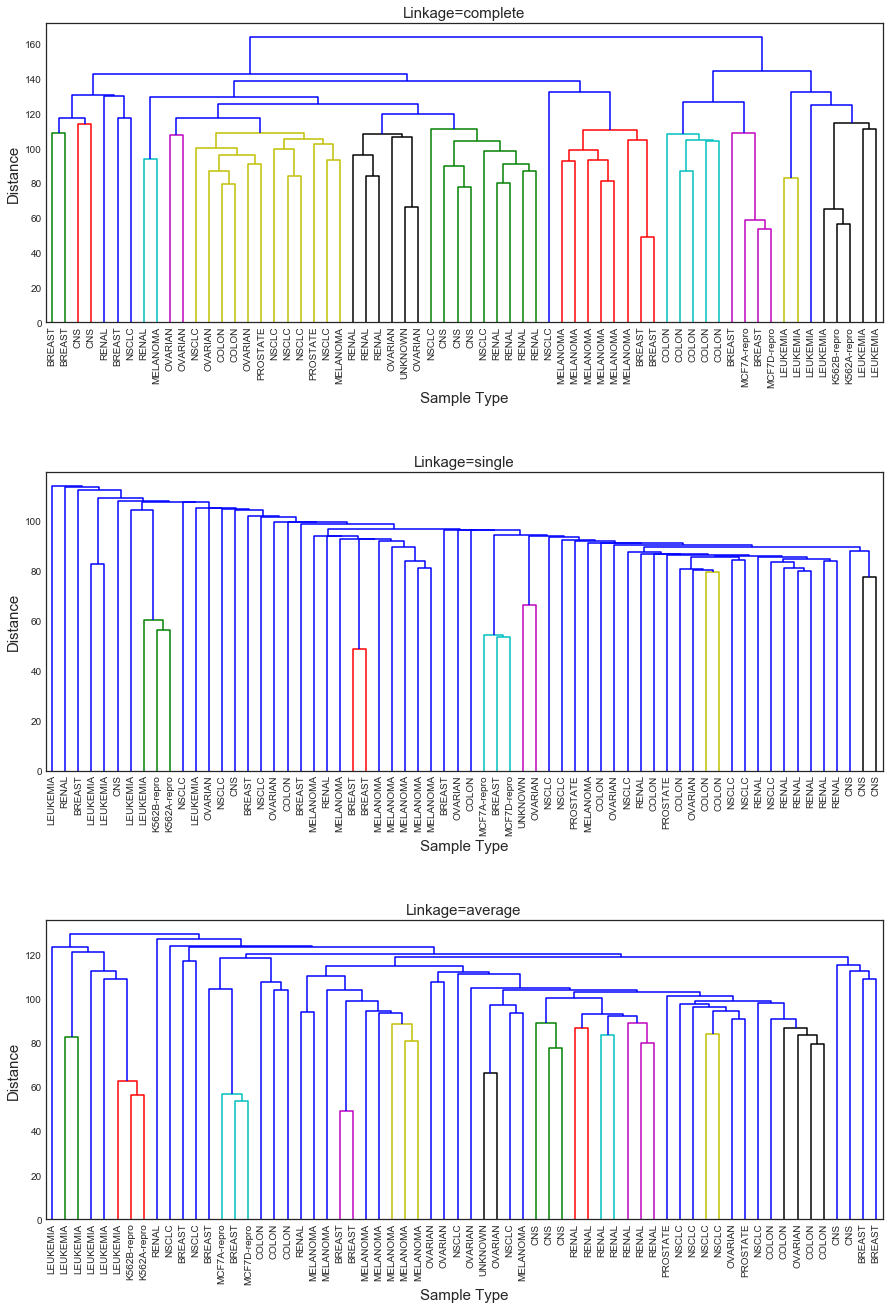

In [51]:
# nci_data에 'cancer type'로 index 명을 붙여 Clustering을 적용했을 때 "cancer type"으로 보이게 하자 
nci_data.index = nci_labs.x

fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y=nci_data, method=link, metric='euclidean')    # X는 ndarray, DataFrame 형식의 2D data array 
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)  
    

3 가지 linkage로 클러스터링 한 결과들이 모두 observation 간의 similarity가 크지 않아 cluster 결합(merge)들이 비교적 뒤 늦게 일어나는 것을 보여줌.
3 가지 linkage 중 'complete'이 비교적 균형잡힌 cluster 모양을 보여줌 ('ward'가 가장 모양이 좋을 때가 많음)

#### Complete linkage Hierarchical Clustering을 이용해 분석을 더 진행

일단 Complete linkage Hierarchical Clustering을 크게 보자.  그리고, 책에서 처럼 cut_off를 139에서 하자


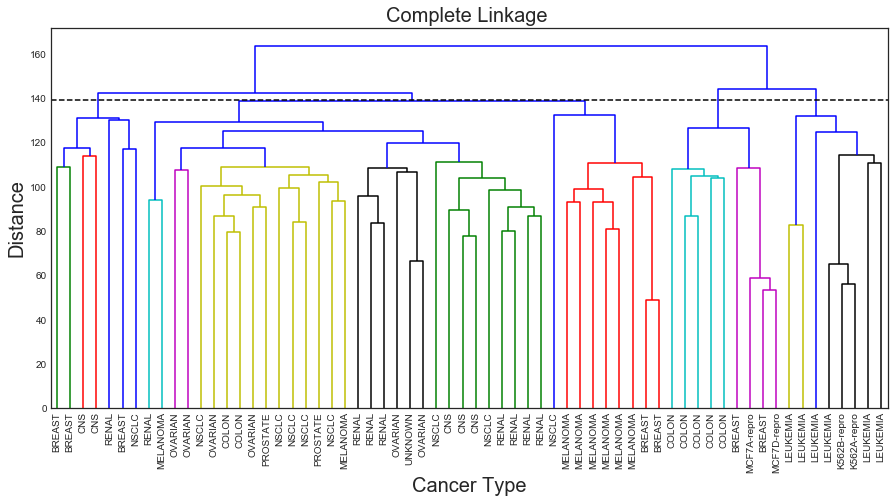

In [34]:
plt.figure(figsize=(15, 7))
plt.title("Complete Linkage ", size=20)
plt.xlabel('Cancer Type', size=20)
plt.ylabel('Distance', size=20)

hc_complete = linkage(y=nci_data, method='complete', metric='euclidean')    
dendrogram(hc_complete, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)  

plt.axhline(y=139, c='k', ls='dashed')
plt.show()

Distance(Height) 139 에서 dendogram을 cut하니 4개의 cluster로 나뉘어진다.
#### Truncated Dendogram

위의 예와 같이 cluster 개수를 4로 할 때 leaves의 수가 많으면 보기에 좋지 않다. 이 때 truncation을 해서 dendogram을 압축하면 좋다.

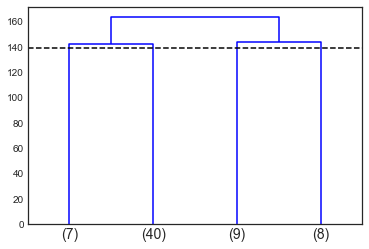

In [35]:
dendrogram(hc_complete, labels=nci_data.index, truncate_mode='lastp', p=4, 
           leaf_font_size=14, show_leaf_counts=True)  

plt.axhline(y=139, c='k', ls='dashed')
plt.show()

왼쪽에서 두번째 클러스터는 distance height=141 부근에서 합쳐지기전 이미 40개의 샘플들을 지니고 있었다.  


#### K=4 on Hierarchical Clustering on NCI60: 
위의 clustering에 클러스터 수를 4개로 하면 어떻게 군집화 되고, 암 종류에 따라 어떻게 clustering 되었는가를 보려고 [cross table/contingency_table](http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.crosstab.html)을 만들면, 

In [52]:
from scipy.cluster.hierarchy import fcluster

In [53]:
hc_4_clust_labels=fcluster(hc_complete, t=4, criterion='maxclust')  
pd.crosstab(index=nci_data.index, columns=hc_4_clust_labels, rownames=['Cancer_type'], 
            colnames=['Cluster_label'], margins=True)

Cluster_label,1,2,3,4,All
Cancer_type,,,,,
BREAST,3,2,2,0,7
CNS,2,3,0,0,5
COLON,0,2,5,0,7
K562A-repro,0,0,0,1,1
K562B-repro,0,0,0,1,1
LEUKEMIA,0,0,0,6,6
MCF7A-repro,0,0,1,0,1
MCF7D-repro,0,0,1,0,1
MELANOMA,0,8,0,0,8


Leukemia, Melanoma, Ovarian은 모두 하나의 cluster에 모였다.  반면 'Breast'는 1,2,3번 cluster에 분산되어 있다. 즉, Leukemia, Melanoma, Ovarian 들은 gene expression에서 자기들끼리 공통적인 고유 특성을 보이지만, Breast는 상대적으로 그렇지 않음. Supervised Learning을 하면 Leukemia, Melanoma, Ovarian 은 잘 분류하겠지만 Breast는 그렇지 않을 것 같다고 생각된다. 

In [38]:
hc_4_clust_labels

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

#### K=4 on K-Means 
K-Means로 clustering 해 보자.  이번에도 K=4 로 해서 앞의 Hierarchical 결과와 비교해 보자 

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmean_4 = KMeans(n_clusters=4, random_state=123, n_init=150)    
kmean_4.fit(nci_data)
kmean_4.labels_
pd.crosstab(index=nci_data.index, columns=kmean_4.labels_, rownames=['Cancer_type'], 
            colnames=['Cluster_label'], margins=True)

Cluster_label,0,1,2,3,All
Cancer_type,,,,,
BREAST,3,2,0,2,7
CNS,5,0,0,0,5
COLON,0,7,0,0,7
K562A-repro,0,0,1,0,1
K562B-repro,0,0,1,0,1
LEUKEMIA,0,0,6,0,6
MCF7A-repro,0,1,0,0,1
MCF7D-repro,0,1,0,0,1
MELANOMA,1,0,0,7,8


Hierarchical Clustering 결과와 다르다. CNS, COLON, RENAL 암의 수가 작지 않음에도 불구하고 (>5) 이들은 모두 어느 한 클러스터에 모였다.  가령, RENAL 종양은 모두 cluster-2에 모였다.  문제는, cluster-2에 RENAL 말고도 7 개 다른 암 종류가 있다는 점.   

In [56]:
pd.crosstab(index=kmean_4.labels_, columns=hc_4_clust_labels, rownames=['K-Means'], 
            colnames=['Hierarchical'], margins=True)

Hierarchical,1,2,3,4,All
K-Means,,,,,
0,7,16,0,0,23
1,0,15,9,0,24
2,0,0,0,8,8
3,0,9,0,0,9
All,7,40,9,8,64


K-Means의 cluster-3과 Hierarchical의 cluster-4가 같은 결과를 보임. K-Means의 다른 클러스터들에 속한 종양 샘플들은 Hiearchical의 여러 클러스터에 분산됨.  

#### 실제로는 암종류가 14가지 이다. 클러스터 개수가 14가 되게 하여 클러스터링을 해 보자. 

In [57]:
hc_14_clust_labels=fcluster(hc_complete, t=14, criterion='maxclust')  
pd.crosstab(index=nci_data.index, columns=hc_14_clust_labels, rownames=['Cancer_type'], 
            colnames=['Cluster_label'], margins=True)

Cluster_label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
Cancer_type,,,,,,,,,,,,,,,
BREAST,2,1,0,0,0,0,0,2,0,0,2,0,0,0,7
CNS,2,0,0,0,0,0,3,0,0,0,0,0,0,0,5
COLON,0,0,0,0,2,0,0,0,0,5,0,0,0,0,7
K562A-repro,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
K562B-repro,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
LEUKEMIA,0,0,0,0,0,0,0,0,0,0,0,2,3,1,6
MCF7A-repro,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
MCF7D-repro,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
MELANOMA,0,0,0,1,1,0,0,6,0,0,0,0,0,0,8


위 crosstab를 조금 신경써 보면 몇 가지 것이 눈에 뜨임. 
- 10번 클러스터에는 'Colon' cancer (직장암)만 들어있음. 직장암의 gene expression은 다른 암에 비해 유독 특별한 모양.  8번 클러스터와 Melanoma (흑생종 피부암) 관계도 비슷. 
- 5번 클러스터에는 특히 NSCLS, OVARIAN, PROSTATE 종양의 상당 빈도가 들어가 있음. 이 3 종류의 종양이 비슷한 gene expression을 공유한다는 말. 이 종양들은 무슨 관계일까?   

--------------------------------------

### Principal Component 들을 이용하여 Clustering
- nci_data_PC_Z : 앞에서 nci_data에 대해 principal component score 들을 구했다. 
- Principal Component를 5개 사용하자. 이러면 대략 원래 데이터의 variance를 36% 정도 설명한다. 원래 6000개가 넘는 feature에서 PC feature 5개만 써서 36% 정보를 유지하고 시작함 
- Complete linkage Hiearchical Clustering 으로 

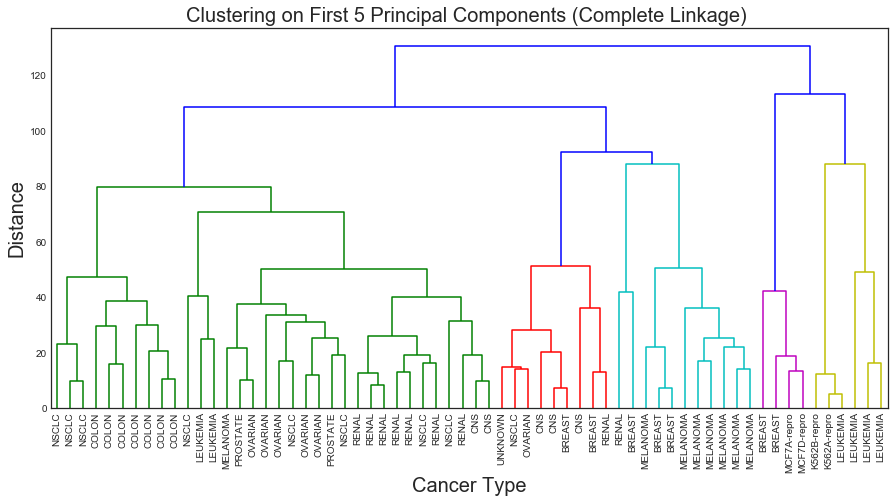

In [43]:
plt.figure(figsize=(15, 7))
plt.title("Clustering on First 5 Principal Components (Complete Linkage) ", size=20)
plt.xlabel('Cancer Type', size=20)
plt.ylabel('Distance', size=20)

hc_PCA = linkage(y=nci_data_PC_Z[:, :5], method='complete', metric='euclidean')    
dendrogram(hc_PCA, labels=nci_data.index, leaf_rotation=90, leaf_font_size=10)  
plt.show()

물론 전체 데이터를 그대로 사용해 clustering 했을 때와 다르다.
#### PC를 사용한 위 Clustering 결과에 Cluster를 4개로 하도록 하면 샘플들이 어떻게 군집할까?

In [58]:
hc_PCA_4_clust_labels=fcluster(hc_PCA, t=4, criterion='maxclust')  

pd.crosstab(index=nci_data.index, columns=hc_PCA_4_clust_labels, rownames=['Cancer_type'], 
            colnames=['Cluster_label'], margins=True)

Cluster_label,1,2,3,4,All
Cancer_type,,,,,
BREAST,0,5,2,0,7
CNS,2,3,0,0,5
COLON,7,0,0,0,7
K562A-repro,0,0,0,1,1
K562B-repro,0,0,0,1,1
LEUKEMIA,2,0,0,4,6
MCF7A-repro,0,0,1,0,1
MCF7D-repro,0,0,1,0,1
MELANOMA,1,7,0,0,8


Principal Component를 기반으로 생성된 Cluster는 당연히 원 데이터를 이용한 것과 다르다. 핵심은 PC 버젼의 성능이 어떤가 하는 점. 경우에 따라선 훨씬 적은 수의 PC feature(즉, PC score)를 쓴 클러스터링이 더 우수한 특성을 보이곤 함. 그 이유 중 하나는 PCA를 통해 feature 데이터의 smoothing/잡음감소 효과가 생기기 때문. 

------------------------------------
### Principal Component 들을 이용한 Multi-Class Classification (Classification using Principal Components)
- PCA를 통해 feature 수를 많이 줄일 수 있어 다행.  Principal component 20개를 쓰면 대략 원 데이터 variance의 70정도를 포착. PC 20개 쓰자

#### 문제 봉착: Class Imbalance
- Class imbalance 문제: Renal, Prostate 종양 샘플들은 9개 씩 있는데, K562A-repro, MCF7A-repro 같이 5개나 되는 클래스가 샘플을 하나 씩만 갖고 있다.  이러면 classification 으로 좋은 결과 기대가 어려울 정도가 아니라 cross-validation 실행 조차 안된다 (scikit-learn은 stratified K-fold를 사용하기에).   
- **Gradient Boosting**이 imbalanced class 에도 썩 잘 동작하지만 이 정도의 imbalance는 곤란. 
- 이런 경우 5개 minority class 에 대해 over-sampling 하거나, synthetic sample generation (인위적으로 소수 클래스 샘플을 생성) 하는 방법이 있다. 
- 이런 classification은 anomaly detection이나 one-vs.-rest 같은 식으로 접근함이 더 효과적일 수 있다. 이들의 output을 input으로 쓰는 stacking 형태의 classifiction이 좋아 보임. 
- 가장 간편한 해결책은, 해결책이라고 할 수 있는지 의문이지만, 아예 minority/소수 클래스를 제거하고 나머지 클래스의 샘플 데이터로 classification 하는 것. 여기서는 이걸로 수행!!

### Gradient Boosting Classifier를 사용. Use Gradient Boosting Classifier on NCI60

In [60]:
# 필요한 api import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle

# Scikit-learn version check
from distutils.version import LooseVersion
from sklearn import __version__ as sklearn_version


from sklearn.model_selection import GridSearchCV   # scikit-learn 0.18 버젼


# 데이터를 정리
X = pd.DataFrame(nci_data_PC_Z[:, :20], index=nci_labs.x.values)
y = pd.DataFrame(nci_labs.x)
y.index = nci_labs.x.values

# drop 6 minority cacer types/classes 
types_drop = ['K562A-repro', 'K562B-repro', 'MCF7A-repro', 'MCF7D-repro', 'PROSTATE', 'UNKNOWN']
X.drop(labels=types_drop, axis=0, inplace=True)
y.drop(labels=types_drop, axis=0, inplace=True)

y = pd.Series(le.fit_transform(y.x))    # label encoding 실행. 8개 종양 타입이 0,1,2, ... 7 으로 변환 

tree_number = list(range(5, 55, 5))
X, y = shuffle(X, y, random_state=123) 

param_grid = [{'n_estimators': tree_number, 'max_depth': [2, 3, 4]}] # grid 탐색 공간 

GB_clf = GradientBoostingClassifier(min_samples_split=2, max_features = 'sqrt', subsample = 0.9,
                                         learning_rate=0.02, random_state=123)

# cv=5 : K 값이 이 보다 더 크면 안됨.  CNS 종양 타입이 5개 샘플만 있음 
GB_clf_gridCV_accuracy = GridSearchCV(GB_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

GB_clf_gridCV_accuracy.fit(X, y)

print("Accuracy Best Score:", GB_clf_gridCV_accuracy.best_score_)
print("Accuracy Best Params:", GB_clf_gridCV_accuracy.best_params_)
print(GB_clf_gridCV_accuracy.best_estimator_)

Accuracy Best Score: 0.6151515151515152
Accuracy Best Params: {'max_depth': 3, 'n_estimators': 50}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### NCI60 예측분석용 8 class Gradient Boosting Tree Classifier 스펙 :
- 'n_estimators': 20, 'max_depth': 3
- Accuracy Score = 0.631578947368

#### 따라서 괜찮은 Classifier 'GB_clf_good' 은  

In [61]:
GB_clf_good = GradientBoostingClassifier(n_estimators=20, max_depth=3, min_samples_split=2, max_features = 'sqrt', subsample = 0.9,
                                         learning_rate=0.02, random_state=123)

**'GB_clf_good' 의 training performance:**

In [62]:
GB_clf_good.fit(X, y)

pred_train = GB_clf_good.predict(X)
conf_mat = metrics.confusion_matrix(y, pred_train) 
conf_mat_df = pd.DataFrame(conf_mat, index=GB_clf_good.classes_, columns=GB_clf_good.classes_)
conf_mat_df.index.name = "True(실제)"
conf_mat_df.columns.name = "Predicted"
print(conf_mat_df)
print()
print("Test Accuracy: ", metrics.accuracy_score(y, pred_train) )
print("Test Sensitivity: ",  metrics.recall_score(y, pred_train, average='weighted') )
print("Test Precision: ",  metrics.precision_score(y, pred_train, average='weighted') )

Predicted  0  1  2  3  4  5  6  7
True(실제)                         
0          7  0  0  0  0  0  0  0
1          0  5  0  0  0  0  0  0
2          0  0  7  0  0  0  0  0
3          0  0  0  6  0  0  0  0
4          0  0  0  0  8  0  0  0
5          0  0  0  0  0  9  0  0
6          0  0  0  0  0  0  6  0
7          0  0  0  0  0  0  0  9

Test Accuracy:  1.0
Test Sensitivity:  1.0
Test Precision:  1.0


Traning Set 성능은 완벽.  
물론 앞에서 보았듯이 Test set 성능은 accuracy=0.63 정도 예상